In [61]:
import pandas as pd
import data
import preprocessing
import numpy as np
import scipy.stats
import seaborn as sns

In [62]:
Authors = data.get_processed_data()
Data, truth, d0, y0 = data.get_prepared_data(split=1)

In [63]:
Data = d0
truth = y0
total = np.hstack((d0,y0.reshape(y0.shape[0],1)))

In [64]:
features = total[:,1:]

In [65]:
for feature in range(features.shape[1]-1):
    print(feature)
    print(scipy.stats.pearsonr(features[:,feature], features[:,-1]) )

0
(0.11725084228722524, 0.04242051683404669)
1
(0.07792958074666348, 0.1782402489049114)
2
(-0.29041386147727355, 3.057252172023657e-07)
3
(-0.042681391549193315, 0.4614186213372495)
4
(-0.19541179867037187, 0.0006655993132108482)
5
(-0.03537423923259844, 0.541641223270434)
6
(0.2729864603345277, 1.586640276122934e-06)
7
(0.23783915497324237, 3.1522811668599425e-05)
8
(-0.10070107592008569, 0.08162376684165693)
9
(0.03922116286610544, 0.4985614561644874)
10
(-0.22835042089855817, 6.565782067821935e-05)
11
(-0.08781837524460265, 0.12910456860789946)
12
(-0.26939991847067013, 2.196132867061892e-06)
13
(-0.20080138883758358, 0.00046671015497555475)
14
(-0.19642209451379522, 0.0006231882682359303)
15
(-0.22821286421670067, 6.634516196869012e-05)
16
(-0.1383965545899108, 0.016455848045883334)
17
(-0.038513887399104024, 0.5063435669954269)
18
(-0.09887282158068995, 0.08734550670525039)
19
(-0.06779929872593349, 0.24169384959156762)
20
(-0.062363211566977335, 0.28161362920422095)
21
(-0.05838

D:\Programs\Anaconda\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [66]:
df = pd.DataFrame(features)

In [67]:
corr = df.astype(float).corr()

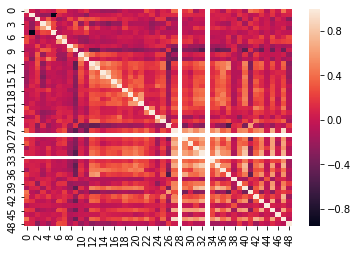

In [68]:
sns.heatmap(corr)

In [69]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
data = df[selected_columns]

In [70]:
data

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,48
0,0.883395,-0.0300548,-1.57492,0.561564,0.122091,0.249166,-0.437948,0.350791,-1.17879,-0.267878,...,0.200239,1.78674,0.546586,2.46732,0.231365,-0.124559,-0.196586,1.07586,-0.0369877,1
1,-0.537003,0.289111,0.615599,0.498642,-0.344505,-0.214758,-0.545376,-0.260546,-1.17879,-0.289628,...,-0.192707,-0.332164,-0.125676,0.89067,-0.336422,-0.25123,-0.347807,-0.107327,-0.345219,0
2,0.499724,0.209319,1.05758,0.755036,0.725331,-0.214758,-0.581185,1.31146,0.598283,0.841334,...,0.593184,-0.634864,-0.013632,1.36485,0.779229,0.00211118,-0.347807,-0.611635,-0.345219,0
3,1.86298,0.448694,0.528551,-0.0391891,0.648134,-0.446721,-0.402139,-0.566214,0.598283,-0.702864,...,-0.880362,1.24188,-0.966003,0.849179,1.23744,3.54889,-0.347807,1.11465,-0.191103,0
4,2.03441,0.448694,1.05758,0.11351,0.315618,-0.446721,0.815378,0.700126,0.598283,-1.1161,...,-0.290944,-0.332164,-0.237719,0.292016,0.809112,0.635464,-0.0453661,0.998271,-0.191103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.483398,0.448694,0.472447,-0.139293,0.0153724,-0.446721,0.170811,2.35947,0.598283,-0.659365,...,0.347593,-0.332164,-0.0696538,-1.3854,0.599928,0.382123,-0.0453661,0.45517,-0.191103,0
296,-0.439044,0.448694,0.20588,0.752862,1.45283,-0.446721,2.57004,1.35513,0.598283,1.31982,...,-0.192707,-0.090003,0.994761,-0.620782,0.0321414,-0.504571,-0.347807,0.280602,-0.0369877,1
297,-1.96556,0.448694,-1.14383,-0.519768,-0.65753,-0.446721,-0.545376,-1.04655,0.598283,-0.267878,...,0.200239,-0.392704,-0.433796,-1.11867,-1.82063,-1.26459,-0.499027,-0.74741,0.887706,1
298,-1.26353,-2.50359,0.975328,-1.22602,0.529247,2.62678,-0.652804,0.612792,0.598283,0.232355,...,-0.290944,-0.392704,0.910728,-0.656346,0.988413,-0.25123,-0.347807,1.09525,-0.0369877,0


In [71]:
df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.883395,-0.0300548,-1.57492,0.561564,0.122091,0.249166,-0.437948,0.350791,-1.17879,-0.267878,...,1.78674,0.546586,2.46732,0.231365,-0.124559,-0.196586,1.07586,-0.0369877,2.02002,1
1,-0.537003,0.289111,0.615599,0.498642,-0.344505,-0.214758,-0.545376,-0.260546,-1.17879,-0.289628,...,-0.332164,-0.125676,0.89067,-0.336422,-0.25123,-0.347807,-0.107327,-0.345219,-0.1615,0
2,0.499724,0.209319,1.05758,0.755036,0.725331,-0.214758,-0.581185,1.31146,0.598283,0.841334,...,-0.634864,-0.013632,1.36485,0.779229,0.00211118,-0.347807,-0.611635,-0.345219,0.372399,0
3,1.86298,0.448694,0.528551,-0.0391891,0.648134,-0.446721,-0.402139,-0.566214,0.598283,-0.702864,...,1.24188,-0.966003,0.849179,1.23744,3.54889,-0.347807,1.11465,-0.191103,0.909169,0
4,2.03441,0.448694,1.05758,0.11351,0.315618,-0.446721,0.815378,0.700126,0.598283,-1.1161,...,-0.332164,-0.237719,0.292016,0.809112,0.635464,-0.0453661,0.998271,-0.191103,1.06417,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.483398,0.448694,0.472447,-0.139293,0.0153724,-0.446721,0.170811,2.35947,0.598283,-0.659365,...,-0.332164,-0.0696538,-1.3854,0.599928,0.382123,-0.0453661,0.45517,-0.191103,0.294898,0
296,-0.439044,0.448694,0.20588,0.752862,1.45283,-0.446721,2.57004,1.35513,0.598283,1.31982,...,-0.090003,0.994761,-0.620782,0.0321414,-0.504571,-0.347807,0.280602,-0.0369877,0.0078554,1
297,-1.96556,0.448694,-1.14383,-0.519768,-0.65753,-0.446721,-0.545376,-1.04655,0.598283,-0.267878,...,-0.392704,-0.433796,-1.11867,-1.82063,-1.26459,-0.499027,-0.74741,0.887706,-1.72588,1
298,-1.26353,-2.50359,0.975328,-1.22602,0.529247,2.62678,-0.652804,0.612792,0.598283,0.232355,...,-0.392704,0.910728,-0.656346,0.988413,-0.25123,-0.347807,1.09525,-0.0369877,0.955096,0
